# Лаб. №3: визуализация данных с использованием библиотек python. Seaborn

Для анализа был выбран датасет "More Guns, Less Crime?", представляющий собой набор данных по 50 штатам США плюс округ Колумбия (в общей сложности 51 штат), с разбивкой по годам за 1977-1999 годы.


Описание датасета: https://vincentarelbundock.github.io/Rdatasets/doc/AER/Guns.html

# Описание данных

Данные являются многомерными, поскольку для каждого года фиксируется вектор наблюдений. Каждая запись характеризуется 13-ю признаками:

1) state - фактор, указывающий на штат;

2) year - год, к которому относятся данные;

3) violent - уровень насильственных преступлений (инциденты на 100 000 человек населения);

4) murder - уровень убийств (инцидент на 100 000);

5) robbery - частота ограблений (инцидент на 100 000);

6) prisoners - количество заключенных в предыдущем году (осужденные на 100 000 жителей; значение за предыдущий год);

7) afam - процент афроамериканцев от населения штата в возрасте от 10 до 64 лет;

8) caucasus - процент населения штата, являющегося европеоидом, в возрасте от 10 до 64 лет;

9) male - процентная доля мужского населения штата в возрасте от 10 до 29 лет;

10) population - население штата, в миллионах человек;

11) income - реальный личный доход на душу населения в штате (доллары США);

12) density - численность населения на квадратную милю площади суши, деленная на 1000;

13) law - фактор. Действует ли в этом году в штате закон о ношении оружия*?

*Закон о ношении оружия - это закон, который требует, чтобы правительства выдавали разрешения на скрытое ношение оружия любому заявителю, который соответствует необходимым критериям. Вторая поправка к Конституции Соединенных Штатов защищает право хранить и носить оружие, также известна как закон о ношении оружия.

In [1]:
# импорт библиотек

import pandas as pd

In [2]:
# чтение файла с диска и загрузка в датафрейм

path = "/content/drive/MyDrive/STUDY/Представление знаний и визуализация данных/Lab_3/Guns.csv"
df = pd.read_csv(path, index_col=0) #index_col=0 - убираем нумерацию строк
df.shape #размерность данных

(1173, 13)

# Типы признаков

In [3]:
# вывод информации о признаках

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 1 to 1173
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1173 non-null   int64  
 1   violent     1173 non-null   float64
 2   murder      1173 non-null   float64
 3   robbery     1173 non-null   float64
 4   prisoners   1173 non-null   int64  
 5   afam        1173 non-null   float64
 6   cauc        1173 non-null   float64
 7   male        1173 non-null   float64
 8   population  1173 non-null   float64
 9   income      1173 non-null   float64
 10  density     1173 non-null   float64
 11  state       1173 non-null   object 
 12  law         1173 non-null   object 
dtypes: float64(9), int64(2), object(2)
memory usage: 128.3+ KB


Типы признаков:

1) state - номинальные категоризованные, неметрическая номинативная шкала;

2) year - номинальные категоризованные, неметрическая номинативная шкала;

3) violent - количественные, метрическая шкала отношений;

4) murder -  количественные, метрическая шкала отношений;

5) robbery -  количественные, метрическая шкала отношений;

6) prisoners -  количественные, метрическая шкала отношений;

7) afam - количественные, метрическая шкала отношений;

8) caucasus - количественные, метрическая шкала отношений;

9) male - количественные, метрическая шкала отношений;

10) population - количественные, абсолютная метрическая шкала;

11) income - количественные, метрическая шкала отношений;

12) density - количественные, метрическая шкала отношений;

13) law - номинальные категоризованные, неметрическая номинативная шкала;

# Визуализация данных с помощью Seaborn

In [4]:
# импорт библиотек
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
# собираем данные для каждого года отдельно,
# чтобы посмотреть динамику принятия закона по годам

cat_par = df['year'].unique()

g1 = []
g2 = []

for y in cat_par:
  g1.append(len(df[(df['year']==y) &(df['law']=='no')]))
  g2.append(len(df[(df['year']==y) &(df['law']=='yes')]))

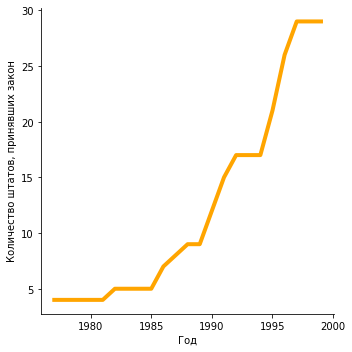

In [6]:
g = sns.relplot(x=cat_par, y=g2, kind="line", legend="full", linewidth = 4,color = 'orange')
g.set_axis_labels("Год", "Количество штатов, принявших закон")
plt.show()

Диаграмма показывает, что количество штатов, в которых принят закон о ношении оружия, увеличивалось с 1977 по 1999 год. Однако закон приняли не во всех штатах.

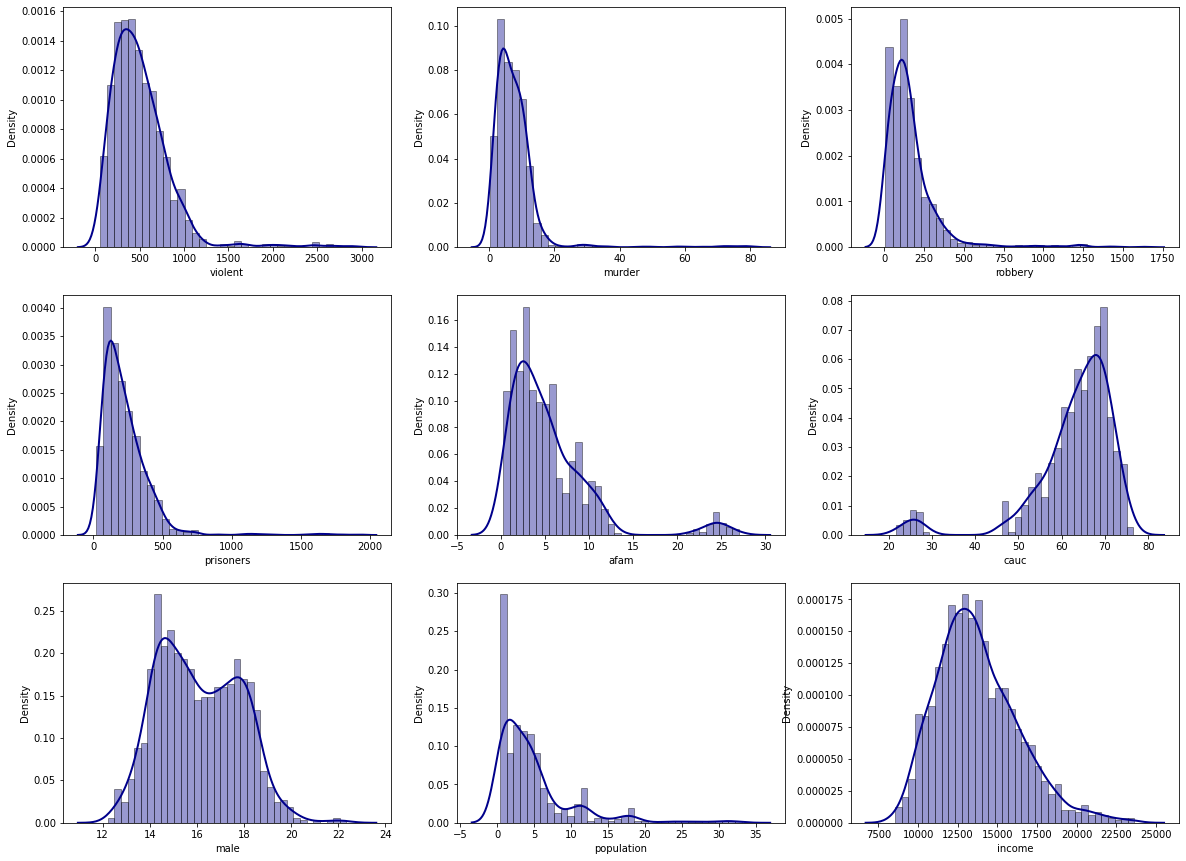

In [7]:
# визуализация численных признаков с помощью distplot

# ставим фильтр на предупреждения
# (метод distplot является нерекомендуемым)
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(20, 15))

# признак violent
plt.subplot(331)
sns.distplot(df['violent'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# признак murder
plt.subplot(332)
sns.distplot(df['murder'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# признак robbery
plt.subplot(333)
sns.distplot(df['robbery'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# признак prisoners
plt.subplot(334)
sns.distplot(df['prisoners'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# признак afam
plt.subplot(335)
sns.distplot(df['afam'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# признак cauc
plt.subplot(336)
sns.distplot(df['cauc'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# признак male
plt.subplot(337)
sns.distplot(df['male'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# признак population
plt.subplot(338)
sns.distplot(df['population'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# признак income
plt.subplot(339)
sns.distplot(df['income'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.show()

## Характер распределений признаков

По гистограммам можно предположить, что признаки распределены асимметрично:

- левостороннее распределение (violent, murder, robbery, prisoners, afam, population, income - асимметрия выражена в меньшей степени)
- правостороннее распределение (cauc)
- бимодальное (male)


При этом гистограммы признаков murder, robbery, prisoners и population напоминают вид графика плотности экспоненциального распределения.

## Поиск закономерностей между признаками

Рассмотрим зависимость уровня преступности от наличия закона в штате по годам.

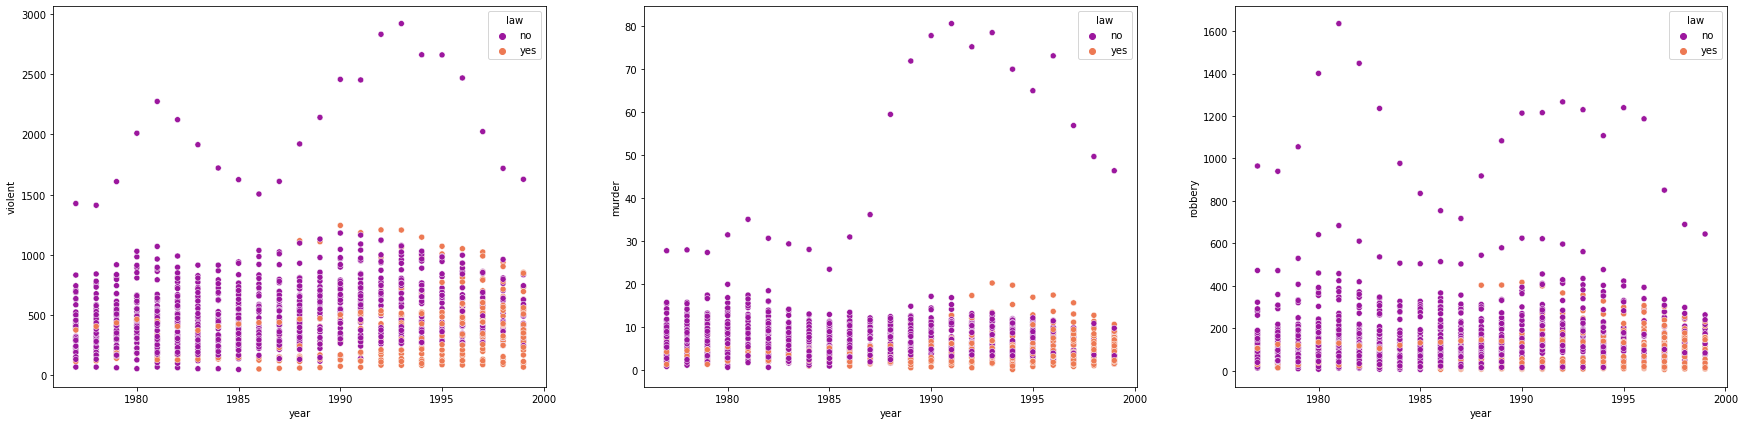

In [8]:
plt.figure(figsize=(30,7))

plt.subplot(131)
sns.scatterplot(x='year', y='violent',  hue = 'law', palette='plasma', data=df)

plt.subplot(132)
sns.scatterplot(x='year', y='murder',  hue = 'law', palette='plasma', data=df)

plt.subplot(133)
sns.scatterplot(x='year', y='robbery',  hue = 'law', palette='plasma', data=df)

plt.show()

Как можно видеть из графиков, существует штат с относительно выскоим уровнем преступности (округ Колумбия). Также нельзя отметить значительных изменений уровня преступности в зависимости от наличия закона. На графиках ниже эти две категории (наличие/отсутствие закона) показаны отдельно.

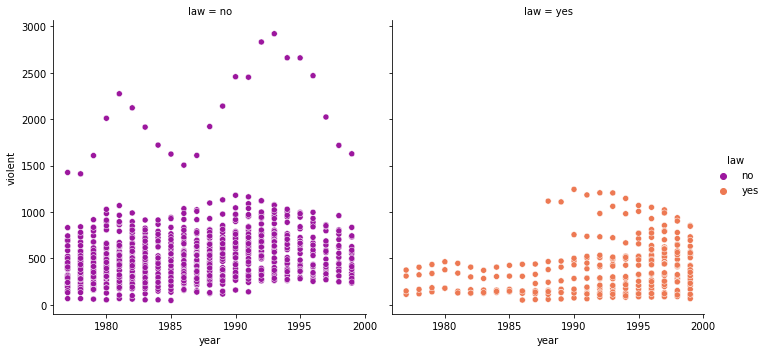

In [9]:
sns.relplot(x='year', y='violent', hue='law', kind='scatter', data=df, col='law',palette='plasma')
plt.show()

В наборе данных есть штаты, в которых закон никогда не был принят в указанном промежутке лет. Разделим штаты на те, в которых закон всё же приняли, и те, в которых закон не был принят никогда.

In [10]:
st_df_no = df[(df['law']=='no') &(df['year']==1999)]    #закон не приняли
st_df_yes = df[(df['law']=='yes') &(df['year']==1999)]  #закон приняли

И выберем из датасета данные, относящиеся к первым десяти (например) штатам в каждой из групп.

In [11]:
st_dyn_no = df.loc[df['state'].isin(st_df_no.head(10)['state'])]
st_dyn_yes = df.loc[df['state'].isin(st_df_yes.head(10)['state'])]

Посмотрим, как менялся уровень преступности в каждой категории.

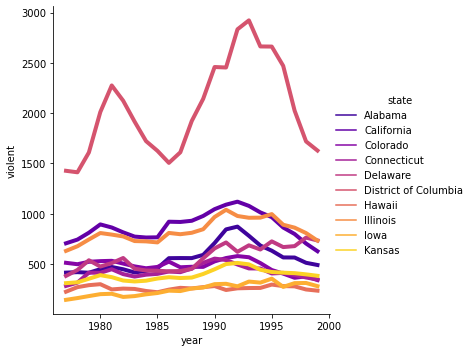

In [12]:
# штаты, в которых никогда не был принят закон

g = sns.relplot(x='year', 
                y='violent', 
                kind="line", 
                legend="full", 
                linewidth = 4,
                color = 'orange', 
                data=st_dyn_no,
                hue='state',
                palette = 'plasma')

plt.show()

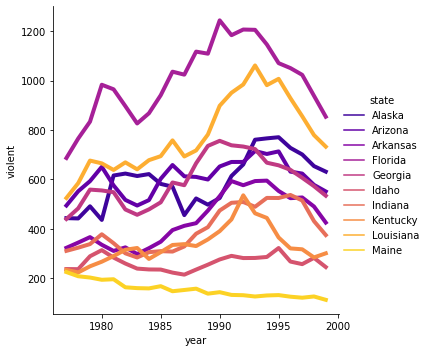

In [13]:
# штаты, в которых существует закон

g = sns.relplot(x='year', 
                y='violent', 
                kind="line", 
                legend="full", 
                linewidth = 4,
                color = 'orange', 
                data=st_dyn_yes,
                hue='state',
                palette = 'plasma')

plt.show()

Между 1990-м и 1995-м годом для обеих групп виден момент некоторого изменения динамики.

Рассмотрим связь количества ограблений с процентами афроамериканцев и европеоидов от населения штата.

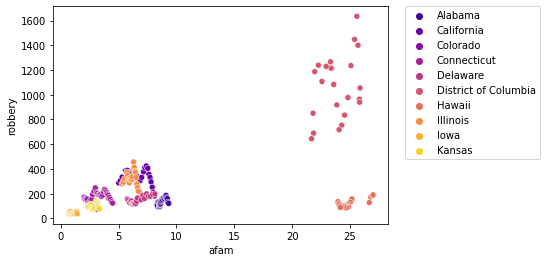

In [15]:
# для штатов, в которых не был принят закон

g = sns.scatterplot(x='afam', y='robbery', hue='state', data=st_dyn_no, palette='plasma')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

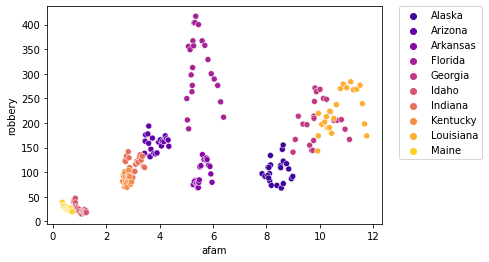

In [16]:
# для штатов, в которых закон принят

g = sns.scatterplot(x='afam', y='robbery', hue='state', data=st_dyn_yes, palette='plasma')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Из графиков можно увидеть некоторую закономерность между количеством ограблений и процентом афроамериканского населения в штате. Большой процент афроамериканцев проживает в округе Колумбия.

Изучим зависимость количества заключенных от процентного соотношения афроамериканского населения штата.

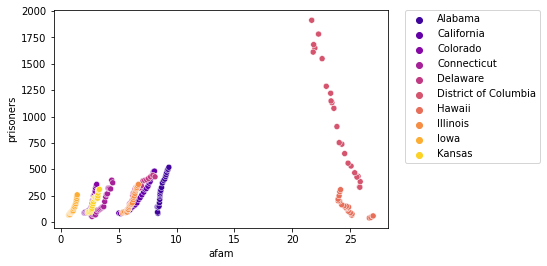

In [17]:
# для штатов, в которых не был принят закон

g = sns.scatterplot(x='afam', y='prisoners', hue='state', data=st_dyn_no, palette='plasma')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

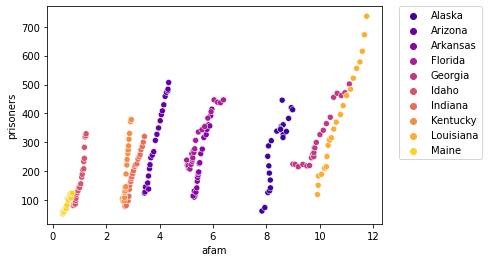

In [18]:
# для штатов, в которых закон принят

g = sns.scatterplot(x='afam', y='prisoners', hue='state', data=st_dyn_yes, palette='plasma')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

На основании графиков можно также предположить существование некоторой зависимости между количеством заключенных и расой.

Рассмотрим зависимость уровня насильственных преступлений в зависимости от процентного соотношения мужского населения штата. Отметим на графике цветами штаты, а размером точек - уровень дохода.

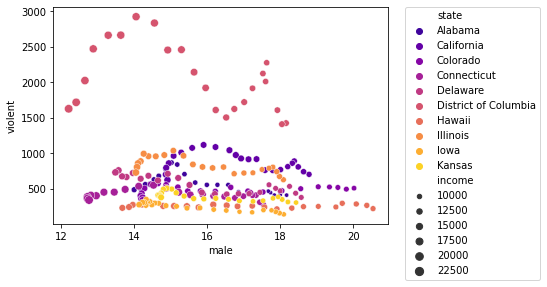

In [19]:
# для штатов, в которых не был принят закон

g = sns.scatterplot(x='male', y='violent', hue='state', size='income',data=st_dyn_no, palette='plasma')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

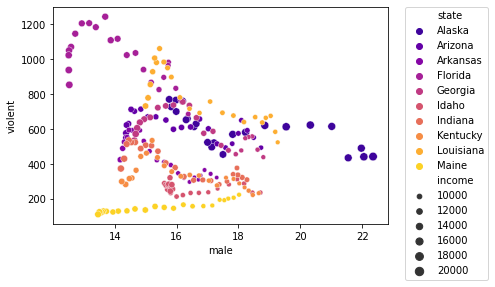

In [20]:
# для штатов, в которых закон принят

g = sns.scatterplot(x='male', y='violent', hue='state', size='income',data=st_dyn_yes, palette='plasma')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

По графикам на основании выбранных штатов можно предположить отсутствие зависимости между уровнем преступности и долей мужского населения/доходом.

## Выбросы

На диаграммах рассеяния заметны выбросы. Наибольшее количество преступлений происходит в округе Колумбия, что подтверждают графики боксплотов ниже.

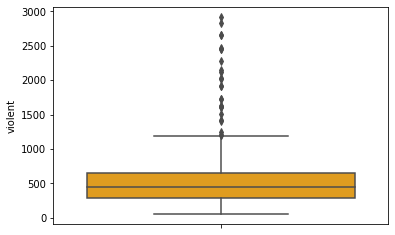

In [21]:
sns.boxplot(y="violent", data=df, color='orange')
plt.show()

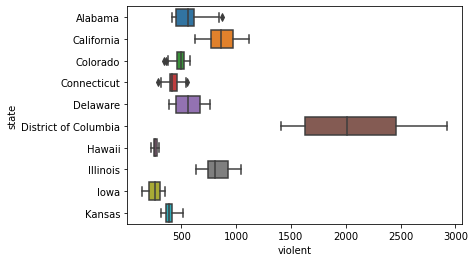

In [22]:
# штаты, в которых отсутствует закон

sns.boxplot(x="violent", y="state", data=st_dyn_no)
plt.show()

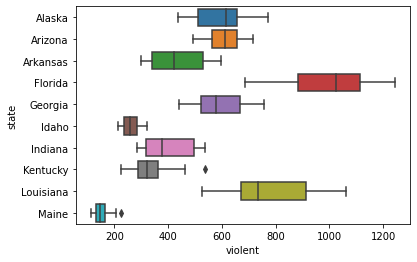

In [23]:
# штаты, в закон приняли

sns.boxplot(x="violent", y="state", data=st_dyn_yes)
plt.show()

Посмотрим, существуют ли выбросы по признаку afam.

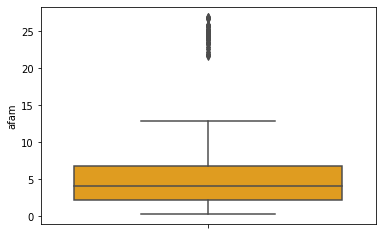

In [24]:
sns.boxplot(y="afam", data=df, color='orange')
plt.show()

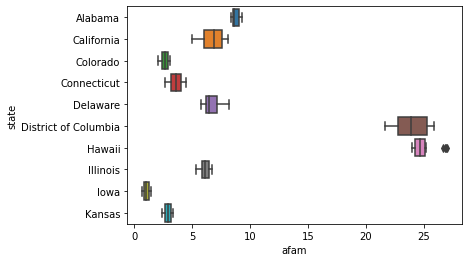

In [25]:
sns.boxplot(x="afam", y="state", data=st_dyn_no)
plt.show()

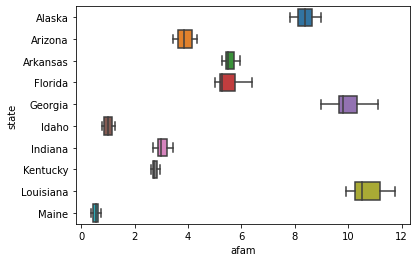

In [26]:
sns.boxplot(x="afam", y="state", data=st_dyn_yes)
plt.show()

Графики показывают, что округ Колумбия и Гавайи превосходят по доли афроамериканского населения остальные штаты (из выбранных).

Рассмотрим признак male.

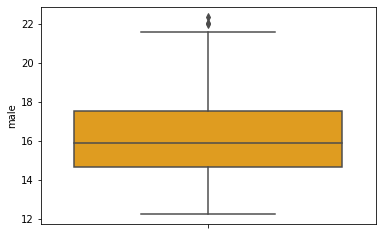

In [27]:
sns.boxplot(y="male",data=df, color='orange')
plt.show()

Выбросы есть, но в этом случае всё не так критично.

Сравним штаты по уровню дохода.

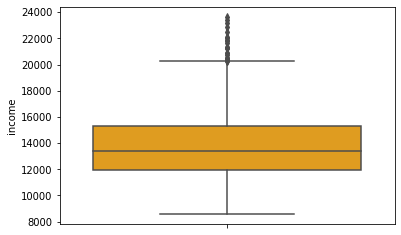

In [28]:
sns.boxplot(y="income", data=df, color='orange')
plt.show()

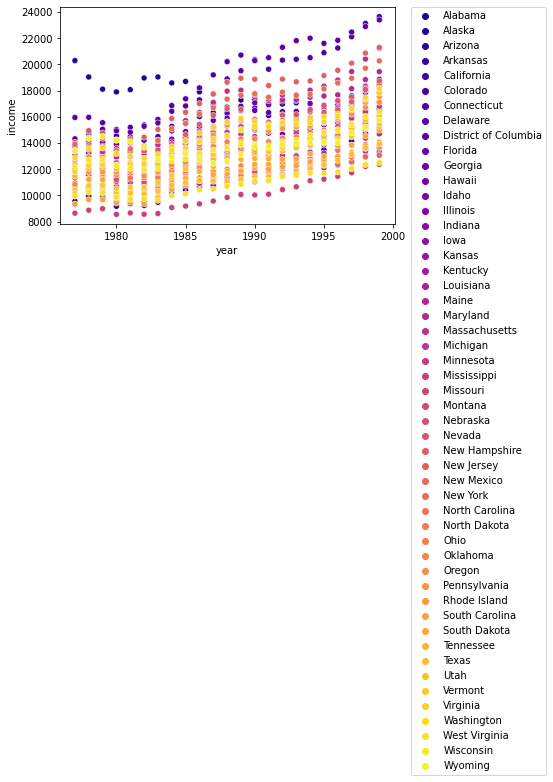

In [29]:
g = sns.scatterplot(x='year', y='income', hue='state', data=df, palette='plasma')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

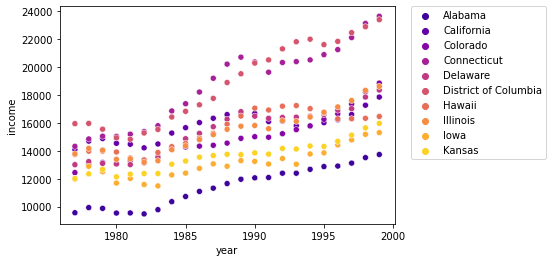

In [30]:
# штаты, в которых закон не был принят

g = sns.scatterplot(x='year', y='income', hue='state', data=st_dyn_no, palette='plasma')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

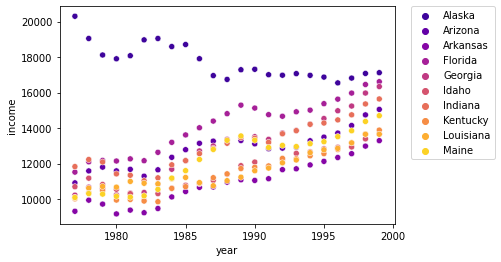

In [31]:
# штаты, в которых закон принят

g = sns.scatterplot(x='year', y='income', hue='state', data=st_dyn_yes, palette='plasma')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Для некоторых штатов действительно уровень дохода достаточно высок.

# Выводы

В рамках лабораторной работы №3 был изучен инструментарий библиотеки Seaborn, позволяющей строить двумерные и трехмерные графики, и с его помощью произведена визуализация признаков датасета "More Guns, Less Crime?" с целью представить характер их распределений и рассмотреть возможные зависимости. Несмотря на разнообразный инструментарий и возможность гибкой настройки визуализации, выполнение лабораторной работы вызвало у меня некоторые трудности по сравнению с предыдущей, поскольку документация Seaborn кажется мне гораздо менее понятной, чем у Matplotlib. Вероятно, так сделано потому, что Seaborn основана на библиотеке Matplotlib, однако отсутствие такого же подробного описания методов вызывает определенные неудобства.